# Task 1: House Price Prediction using Linear Regression

## Objective
To predict house prices using real-world housing data
obtained from Kaggle using a Linear Regression model.

## Dataset Source
Kaggle (House Price Dataset)


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## Load Dataset

The dataset is loaded from a CSV file downloaded from Kaggle.


In [ ]:
#Read CSV FILES
df = pd.read_csv("HousePricedataset.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
#Data Understanding

#We examine the structure, data types,
#and statistical summary of the dataset.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
#Missing Value Check
df.isnull().sum()


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


## Feature Selection

Independent Variables (X):
- Area
- Bedrooms

Dependent Variable (y):
- Price

In [ ]:
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors']]
y = df['price']


Train-Test Split

The dataset is split into training and testing sets
to evaluate model performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


##  Model Training

Linear Regression is used to train the model
on the training dataset.


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Prediction

The trained model is used to predict house prices
for the test dataset.


In [ ]:
y_pred = model.predict(X_test)


##  Model Evaluation

The model is evaluated using the R² score,
which indicates how well the model fits the data.


In [ ]:
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.02764054518114245


Visualization

A scatter plot is used to compare actual
and predicted house prices.

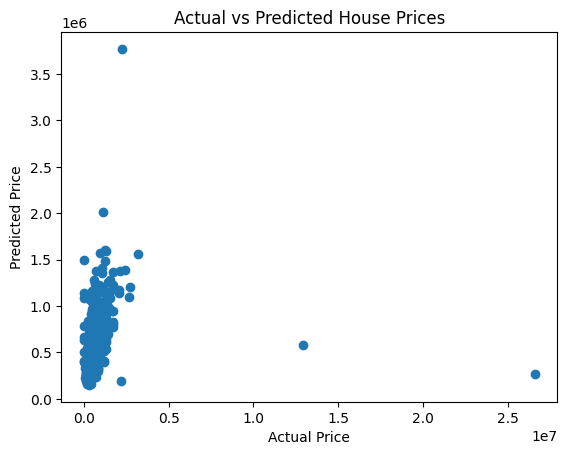

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


## Conclusion

A Linear Regression model was successfully built
using real-world Kaggle housing data.

The project demonstrates:
- Data loading and exploration
- Feature selection
- Model training and evaluation
- Visualization of results


# Task 2: Iris Flower Classification

## Objective
The objective of this project is to classify Iris flowers
into three different species using supervised machine learning.

## Problem Type
Classification (Supervised Learning)

## Classes
- Iris-setosa
- Iris-versicolor
- Iris-virginica


In [ ]:
#Import REquired Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
### Step 3: Load Dataset

#The Iris dataset is a famous benchmark datasetavailable directly in the scikit-learn library.

iris = load_iris()

X = iris.data
y = iris.target

iris.feature_names, iris.target_names


(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [ ]:
 #Dataset Overview

#The dataset contains four numerical features:
#- Sepal length
#- Sepal width
#- Petal length
#- Petal width
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
### Step 7: Train-Test Split

#The dataset is split into training and testing sets
#to evaluate model performance.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:

## Model Selection
#Logistic Regression is used as the classification model
#to predict the Iris flower species.
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
#Make Prediction
y_pred = model.predict(X_test)


In [ ]:
#Model Evalution
#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

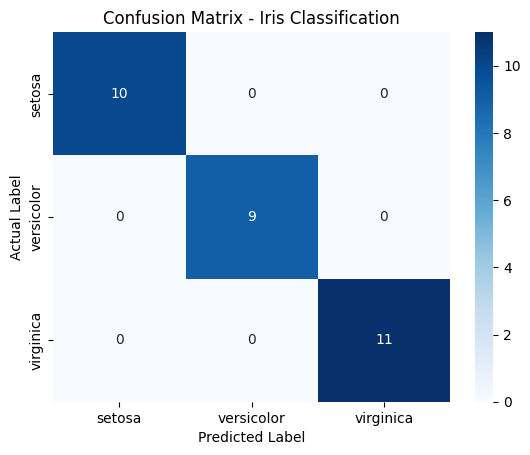

In [ ]:
#Confusion Matrix Plot VIsualisation
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Iris Classification")
plt.show()


## Conclusion

The Logistic Regression model successfully classified
Iris flowers into three species with high accuracy.

This project demonstrates:
- Use of a standard ML dataset
- Classification model training
- Model evaluation using accuracy and confusion matrix


# Student Performance Prediction

## Objective
The objective of this project is to predict students’ final scores
based on factors such as study hours and attendance
using a Multiple Linear Regression model.

## Problem Type
Regression (Supervised Learning)


In [ ]:
#OImport Library Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


##  Dataset Description

The dataset contains student-related attributes such as:
- Study hours
- Attendance percentage
- Final exam score (target variable)

This dataset can represent real academic performance data.


In [ ]:
# Data reading
import pandas as pd

df = pd.read_csv("Student_Performance.csv")
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
#check columnemaes
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
# Selected features
X = df[['Hours Studied', 'Previous Scores']]
y = df['Performance Index']


In [ ]:
#Traun Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train Multiple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Prediction
y_pred = model.predict(X_test)


In [ ]:
#Model Evolution
from sklearn.metrics import r2_score, mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.985855014245765
Mean Squared Error: 5.241921186551515


Analyze Which Factor Affects Performance Most

In [ ]:
impact = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_
})

impact


,Feature,Impact
0,Hours Studied,2.858155
1,Previous Scores,1.017372


Visualisation

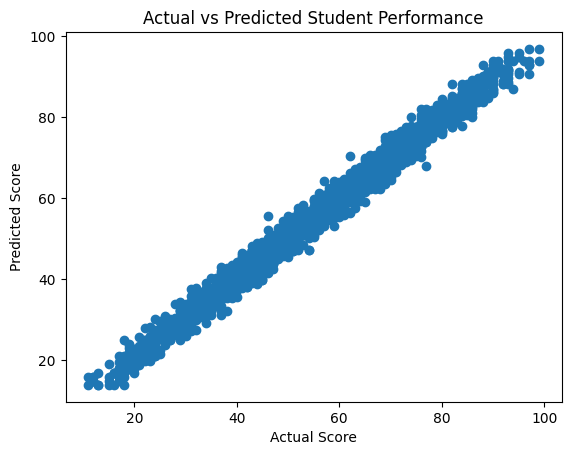

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Student Performance")
plt.show()


## Dataset Source
The dataset used in this project was provided in CSV format
and contains student study-related attributes and performance scores.

## Feature Mapping
- Hours Studied → Study effort
- Previous Scores → Academic background
- Performance Index → Final performance (target variable)


# Task 4: Titanic Survival Prediction

## Objective
The objective of this project is to predict whether a passenger
survived the Titanic disaster using classification techniques.

## Problem Type
Classification (Supervised Learning)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
#Load Titanic Dataset
import pandas as pd
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df = df[['Survived', 'Sex', 'Age', 'Fare', 'Pclass']]
df.head()


,Survived,Sex,Age,Fare,Pclass
0,0,male,22.0,7.2500,3
1,1,female,38.0,71.2833,1
2,1,female,26.0,7.9250,3
3,1,female,35.0,53.1000,1
4,0,male,35.0,8.0500,3


In [ ]:
#filling Missing Values
df['Age'].fillna(df['Age'].mean(), inplace=True)



/tmp/ipython-input-484796971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [ ]:
df.head()


,Survived,Sex,Age,Fare,Pclass
0,0,0,22.0,7.2500,3
1,1,1,38.0,71.2833,1
2,1,1,26.0,7.9250,3
3,1,1,35.0,53.1000,1
4,0,0,35.0,8.0500,3


In [ ]:
X = df[['Sex', 'Age', 'Fare', 'Pclass']]
y = df['Survived']


In [ ]:
#Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
#Model Training
#Logistic regression
## Model Training
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Prediction

In [ ]:
y_pred = model.predict(X_test)

## Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.80
Confusion Matrix:
[[89 16]
 [20 54]]


## Visualization of Confusion Matrix

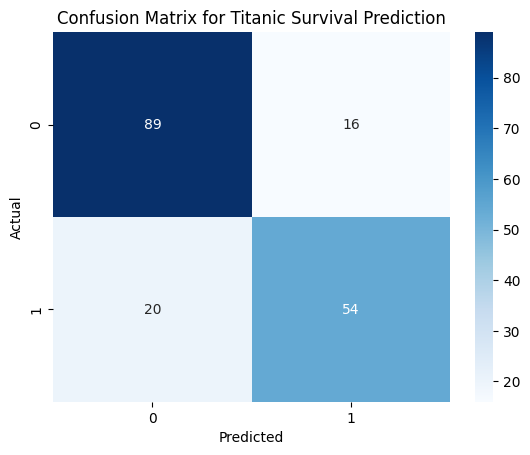

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

## Conclusion

In this project, a Logistic Regression model was developed
to predict the survival of passengers aboard the Titanic
using demographic and ticket-related features.

Categorical data was properly encoded, missing values were handled,
and the model was trained on real-world data.
The model’s performance was evaluated using accuracy
and a confusion matrix.

This project demonstrates the complete machine learning workflow,
including data preprocessing, classification model training,
and performance evaluation using Python and Scikit-learn.
